This comparison comes from a mistake I have made when running the solutions.

I planned to replace the ICRF3 positions by the *Gaia* DR2 positions and run a new solution to see the difference.
However, there was some bugs in my code, causing the .src file of *Gaia* DR2 only containing one line which is
>     0002-478  00 04 35.65547489   -47 36  19.6037728     0.382  ! GaiaDR2_IERS

However, the NNR constraint of source positions was applied to 250 radio sources among the ICRF3 defining source list.
And the Galactic aberration effect was affected 

Later I found this error and fix it.
Then I got two solutions and it rose my interests of seeing if there is any difference.

Here are the results.

In [17]:
from astropy.table import Table, Column
from astropy.time import Time
import astropy.units as u
import bottleneck as bn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Source position offset

The positional offsets show the pattern of orientation offset between axes of CRF.

The orientation offset is represented by three rotation angles: $R_X$ ~ +56$\,\mu$as, $R_Y$ ~ -29$\,\mu$as,
and $R_Z$ ~ -30$\,\mu$as.

In [2]:
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.pos_diff import radio_cat_diff_calc

gcfsol1 = read_sou("../data/gcrf-a1u-free-test1/gcrf-a1u-free-test1.sou")
gcfsol2 = read_sou("../data/gcrf-a1u/gcrf-a1u.sou")

# Calculate the positional difference
soldif = radio_cat_diff_calc(gcfsol1, gcfsol2, sou_name="iers_name")

In [3]:
soldif

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,ra_err_2,dec,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000+212,0.3226783581263957,0.6656,0.6825256087314274,0.830625059625,0.3226783581448785,21.495696603861113,0.6656,0.6825256087337473,-0.04856923376636619,0.030000002482211127,0.45633611035970073,0.941300547115532,-0.1816994090381177,0.057087394559434915,-0.10643302746320503,0.031870801067885736,0.10741790911130075
0000-160,0.10873876566524804,0.2664,0.2696581377251122,0.8636006540416667,0.10873876566077724,-15.78484871963889,0.2664,0.26965813772480307,-0.013856975439743398,0.030000002482211127,0.1537798371563423,0.37674649301619256,-0.02062522110691012,0.033045664122095135,-0.09010918268599492,0.07962914861405684,0.10348350091332963
0000-197,0.1352113348995166,0.2846,0.2847077687309634,0.8278126037083334,0.13521133489259266,-19.45620989577778,0.2846,0.28470776873094916,-0.009900411993019494,0.02989999927649478,0.19121770359657098,0.4024851798513829,-0.003925076882964548,0.0314964778088902,-0.05177560344468562,0.07428844780703556,0.0884732750062359
0000-199,0.08887630012489159,0.2019,0.20325854305172888,0.8164558447916667,0.08887630012027932,-19.697333814472223,0.2019,0.20325854305155794,-0.009603159212583106,0.02989999927649478,0.1256900690069019,0.2855297182431279,-0.0085772917474905,0.031404308997279466,-0.07640348428845063,0.10471764361506847,0.11732510010673797
0001+459,0.07599036789977918,0.0958,0.09585064141272424,1.0671985271666666,0.07599036791136511,46.25499187216667,0.0958,0.09585064141276568,-0.06129705301213378,0.030099980108388987,0.1074666089017813,0.1354816592753425,0.0003639938622676906,0.06828863383095134,-0.5703823135254598,0.2221701466411487,0.6174706045393964
0001+478,0.27705445183841615,0.3368,0.3413004938210666,0.9418399454583335,0.2770544518833548,48.11781540213889,0.3368,0.34130049382501587,-0.061886621256399876,0.03000001527198037,0.391814163337508,0.47630712780725837,-0.02202161769527211,0.06877466689742773,-0.157948913151184,0.06298460283407752,0.16414095403287196
0001-120,0.046787092385180334,0.102,0.10211463384619283,1.0204791610833335,0.046787092383751956,-11.816218367166668,0.102,0.102114633846184,-0.018205856756108845,0.030099999293042853,0.06616694059411497,0.14424978336205568,-0.0008781001498716606,0.035177594824904304,-0.2751503483860354,0.20866581974334206,0.3310779921300418
0002+051,0.21513987514623517,0.2483,0.2592603661415509,1.3342311322083333,0.21513987514923413,5.403000771194445,0.2483,0.2592603661423098,-0.035392053116376866,0.030399999317864964,0.3042537292411807,0.3511492275372395,0.021581369323669736,0.046655732577236764,-0.11632413908169956,0.08657287823491235,0.16174726699103603


In [42]:
mask = (soldif["iers_name"] == "0002-478")
soldif[mask]

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,ra_err_2,dec,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0002-478,0.0358017298137203,0.0623,0.06376081469884638,1.1485644891666666,0.03580172980795961,-47.605445543694444,0.0623,0.06376081469820981,0.020833775079923792,0.030299986519821683,0.050631291854907,0.08810550493584382,0.0014319474665522413,0.0367713933266368,0.41148021937948354,0.3439057132909613,0.46833563761110736


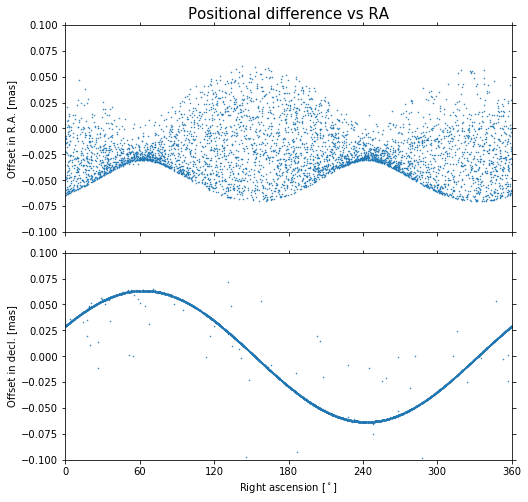

In [6]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["ra"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["ra"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("Positional difference vs RA", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

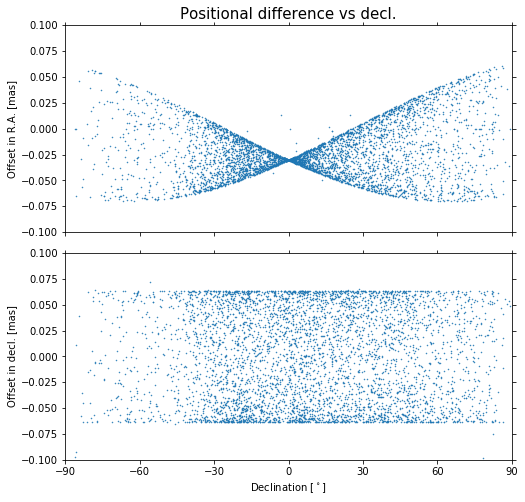

In [7]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["dec"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["dec"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("Positional difference vs decl.", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

In [12]:
# My modules
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting

# icrf2-ga-19 - icrf3-ga-19
# Transform columns into np.array
dra1 = np.array(soldif["dra"])
ddec1 = np.array(soldif["ddec"])
dra_err1 = np.array(soldif["dra_err"])
ddec_err1 = np.array(soldif["ddec_err"])
ra_rad1 = np.array(soldif["ra"].to(u.radian))
dec_rad1 = np.array(soldif["dec"].to(u.radian))
dra_ddec_cov1 = np.array(soldif["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
par1, sig1, _, _, _, _ = vsh_deg02_fitting(
    dra1, ddec1, ra_rad1, dec_rad1, dra_err1, ddec_err1,
#     cov=dra_ddec_cov1, elim_flag="None")
         elim_flag="None")

# mas -> uas
par1 = par1 * 1.e3
sig1 = sig1 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra1.size,
       par1[3], sig1[3], par1[4], sig1[4], par1[5], sig1[5],
       par1[0], sig1[0], par1[1], sig1[1], par1[2], sig1[2],))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])

print("Positional difference")
t_quad1 = Table([quad_names, par1[6:], sig1[6:]],
                names=["Quadrupolar term", "Estimate", "Error"])
t_quad1["Estimate"].format = "%5.0f"
t_quad1["Error"].format = "%5.0f"
print(t_quad1)

Estimates (  4600 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
         +56 +/-   0   -29 +/-   0   -30 +/-   0          +0 +/-   0    -0 +/-   0    -0 +/-   0
--------------------------------------------------------------------------------------------

Positional difference
Quadrupolar term Estimate Error
---------------- -------- -----
            ER22        0     0
            EI22        0     0
            ER21        0     0
            EI21       -0     0
             E20        0     0
            MR22       -0     0
            MI22       -0     0
            MR21        0     0
            MI21        0     0
             M20       -0     0


## EOP difference

The polar motion shows insignificant offset, but the offset is about 2$\,\mu$s in *UT1* and ~ -25$\,\mu$as in dX and ~ -55$\,\mu$as in dY of CPO.

In [18]:
from my_progs.vlbi.read_eop import read_eob
from my_progs.vlbi.comp_eop import calc_eop_offset

gcfeob1 = read_eob("../data/gcrf-a1u-free-test1/gcrf-a1u-free-test1.eob")
gcfeob2 = read_eob("../data/gcrf-a1u/gcrf-a1u.eob")

eoboft = calc_eop_offset(gcfeob1, gcfeob2, "../logs/test_eob_offset.dat")

# Create a Time object for epochs of EOP
eoboft.sort("epoch_pmr")

# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")

nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

There are 6633 and 6633 points in series 1 and series 2, respectively,between which 6633 are common.
Save the EOP offset series in ../logs/test_eob_offset.dat


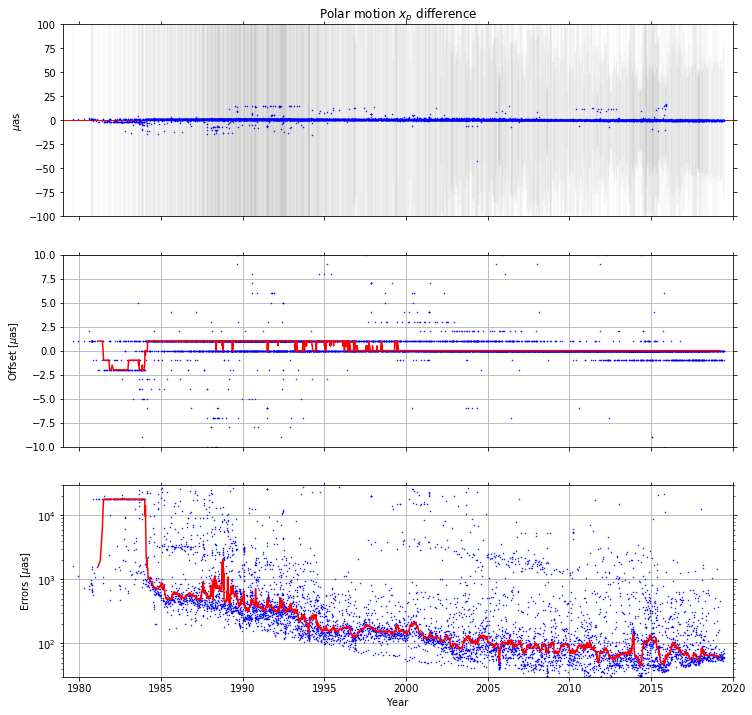

In [22]:
# Polar motion xp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dxp"],
            yerr = eoboft["dxp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dxp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dxpmed = bn.move_median(eoboft["dxp"], window=50)
ax1.plot(epomed, dxpmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dxp_err"], "b.", ms = 1)
dxperrmed = bn.move_median(eoboft["dxp_err"], window=50)
ax2.plot(epomed, dxperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
# ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-10, 10])
ax2.set_ylim([30, 30000])

# Titles and Labels
ax0.set_title("Polar motion $x_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

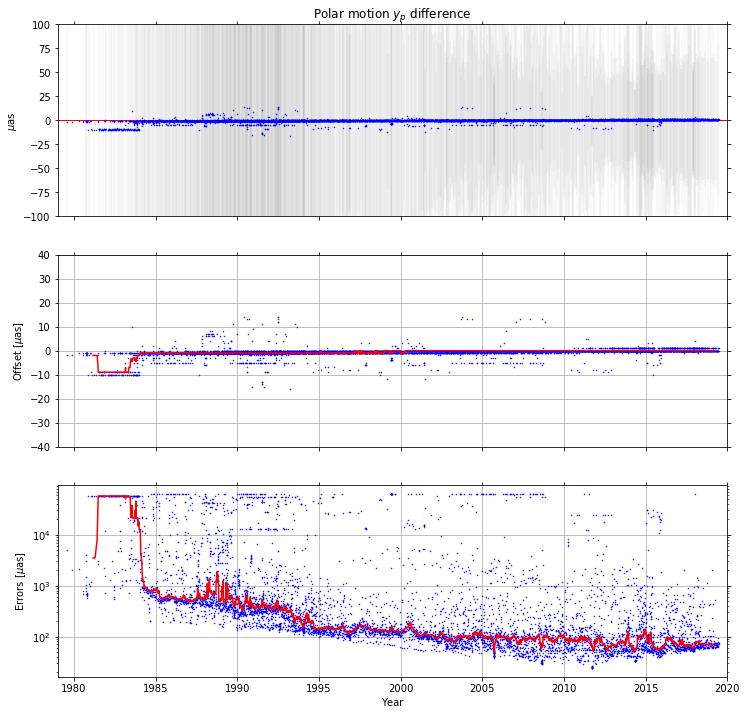

In [23]:
# Polar motion yp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dyp"],
            yerr = eoboft["dyp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dyp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dypmed = bn.move_median(eoboft["dyp"], window=50)
ax1.plot(epomed, dypmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dyp_err"], "b.", ms = 1)
dyperrmed = bn.move_median(eoboft["dyp_err"], window=50)
ax2.plot(epomed, dyperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-40, 40])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("Polar motion $y_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

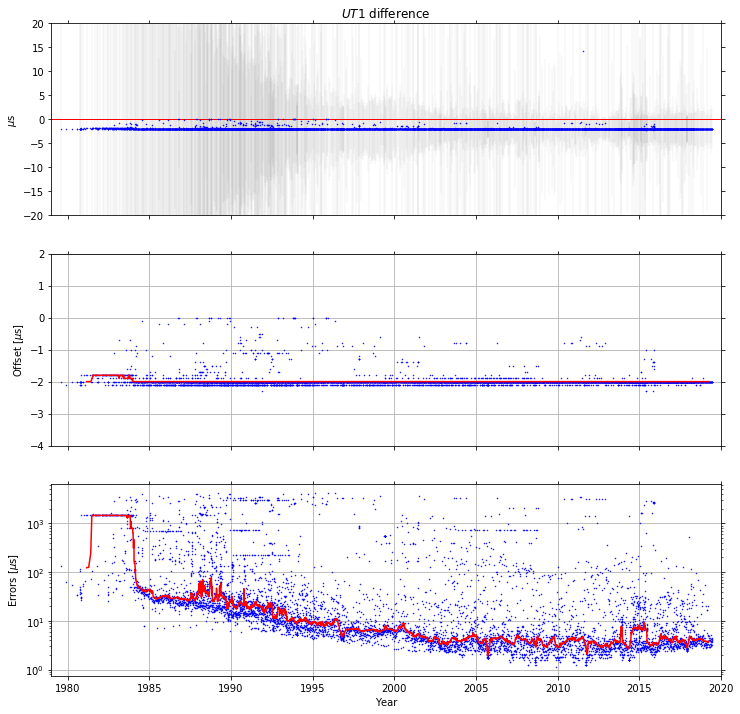

In [25]:
# UT1
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dut"],
            yerr = eoboft["dut_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dut"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["dut"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dut_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["dut_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -20, 20])
ax1.set_ylim([-4, 2])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("$UT1$ difference")
ax0.set_ylabel("$\mu$s")
ax1.set_ylabel("Offset [$\mu$s]")
ax2.set_ylabel("Errors [$\mu$s]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

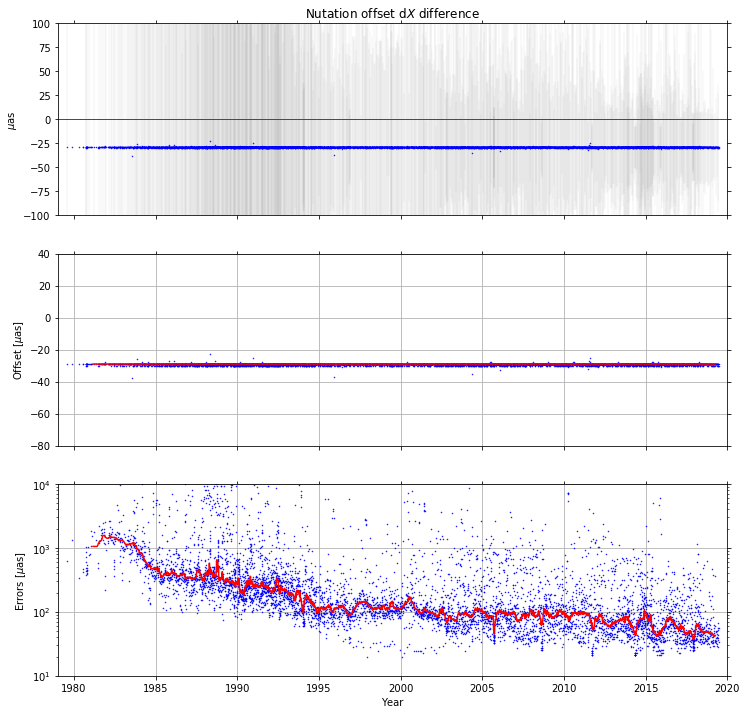

In [26]:
# Nutation offset dX
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddX"],
            yerr = eoboft["ddX_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddX"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddX"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddX_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddX_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-80, 40])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$X$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

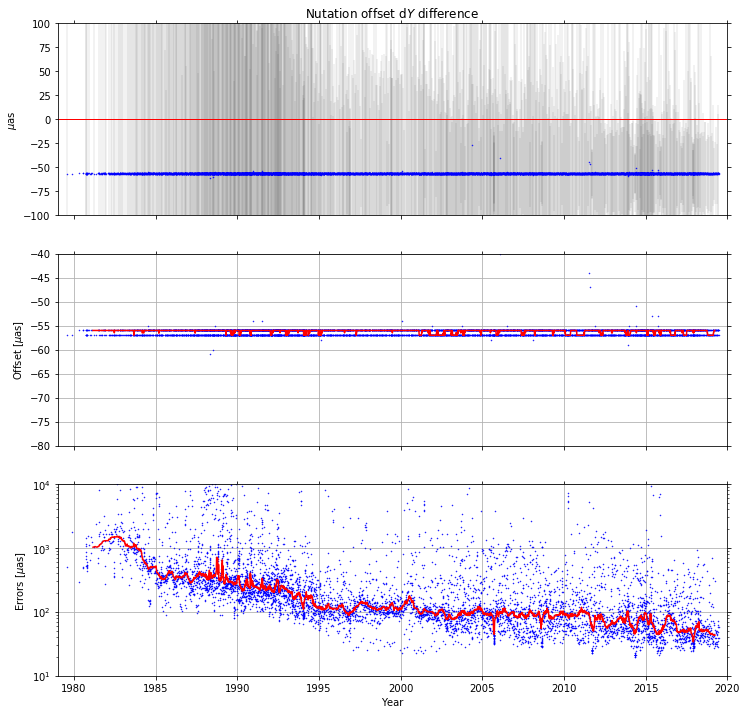

In [29]:
# Nutation offset dY
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddY"],
            yerr = eoboft["ddY_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.1,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddY"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddY"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddY_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddY_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -100, 100])
ax1.set_ylim([-80, -40])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$Y$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

## Difference in the station position and velocity

No significant difference and global sysmatics was found.

In [30]:
from my_progs.vlbi.read_trf import read_trf
from my_progs.vlbi.comp_trf import calc_trf_offset

# Station position and velocity
trf1 = read_trf("../data/gcrf-a1u-free-test1/gcrf-a1u-free-test1")
trf2 = read_trf("../data/gcrf-a1u/gcrf-a1u")

# Calculate the station position differences
trfoft = calc_trf_offset(trf1,  trf2)
trfoft

There are 188 and 188 stations in two sets, respectively, between which 188 are common.


station,xp,yp,zp,dxp,dxp_err,dyp,dyp_err,dzp,dzp_err,dxp_dyp_cov,dxp_dzp_cov,dyp_dzp_cov,xv,yv,zv,dxv,dxv_err,dyv,dyv_err,dzv,dzv_err,dxv_dyv_cov,dxv_dzv_cov,dyv_dzv_cov
,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
AGGO,2765116663.56,-4449233667.01,-3626420647.03,-1.5299997329711914,93.56861192729107,1.489999771118164,115.47195158132558,1.570000171661377,96.34047050954236,-8632.835630574,-6688.717520716,9266.810247618,2.76,-13.5,8.63,0.16000000000000014,10.19506557114764,-0.16999999999999993,12.623270257742247,-0.1800000000000015,10.586802727924988,-103.213444536,-80.733994704,111.723100192
AIRA,-3530219644.68,4118797501.99,3344015635.4,0.0,1.7366542545941608,0.0,1.828578136148412,0.0,1.6602867222260136,-2.934261792,-2.5113926239999995,2.6868281399999994,-25.09,-6.77,-16.01,0.0,0.4087077195258244,-0.010000000000000675,0.3790092347159895,-0.00999999999999801,0.4087077195258244,-0.1277958,-0.11692939999999998,0.12314868
ALGOPARK,918034534.99,-4346132316.84,4561971216.2,0.0,0.36769552621700474,0.0,0.7764032457428293,0.010000228881835938,0.8273149339882605,-0.12504024,0.10342799999999999,-0.513864,-16.11,-3.8,4.0,0.0,0.06929646455628166,0.0,0.08061017305526642,0.0,0.10748023074035522,-0.00039102000000000006,0.000305368,-0.002573208
AUSTINTX,-737794278.52,-5459892554.84,3202989662.07,0.019999980926513672,14048.896523563692,-0.06999969482421875,14131.246179300677,-0.019999980926513672,14120.625435447257,198528.41532199996,-198379.20559060003,-399084.068468,-24.48,-13.55,-36.73,0.0,625.1092646265931,-0.009999999999999787,628.7635924717652,0.0,628.3181151996176,393.045946914,-392.767474944,-790.1271106560001
AZORES,4552169516.5,-2186665847.92,3882780834.19,0.14999961853027344,11192.937489185222,-0.04999971389770508,8200.420579010446,0.09000015258789062,10452.445368431734,-34787195.27691307,52179131.15761908,-27000051.15158505,-292.23,-60.68,60.64,0.009999999999990905,636.5615660546904,0.0,466.3906623078983,0.0,594.432144031596,-112519.93437856801,168763.124807028,-87329.84442588002
BADARY,-838200986.93,3865751562.5,4987670891.28,0.0,0.39456558390209356,0.0,0.6759940828143394,0.010000228881835938,0.9065108934811539,-0.022938264,-0.08190826200000001,0.38912546000000003,-27.19,0.47,-2.84,0.0,0.13010764773832473,0.0,0.09758073580374356,0.0,0.2036467529817257,0.0018917040000000001,0.000556416,0.002026944
BERMUDA,2307204098.71,-4874226464.44,3394338408.11,-0.039999961853027344,9486.40032661536,0.39999961853027344,12371.118807998248,-0.019999980926513672,10903.679903991679,-29339346.375198,5068396.957524264,-51663145.58254231,-244.25,-472.46,914.32,0.0,423.39149894394427,0.01999999999998181,552.2023128455729,0.0,486.7157396263244,-58449.441239,10097.49402144,-102937.20837696
BLKBUTTE,-2306307292.46,-4787914382.22,3515736294.02,-0.009999752044677734,101.54477641907533,-0.009999275207519531,206.49356488278272,0.0,146.80809569638862,20192.514191513998,-14102.585110283999,-29041.700098572,-18.66,2.95,-6.68,0.0,4.423660023103041,0.0,8.974599266819661,0.0,6.403559010425374,38.231654688000006,-26.797500927999995,-55.055662207999994


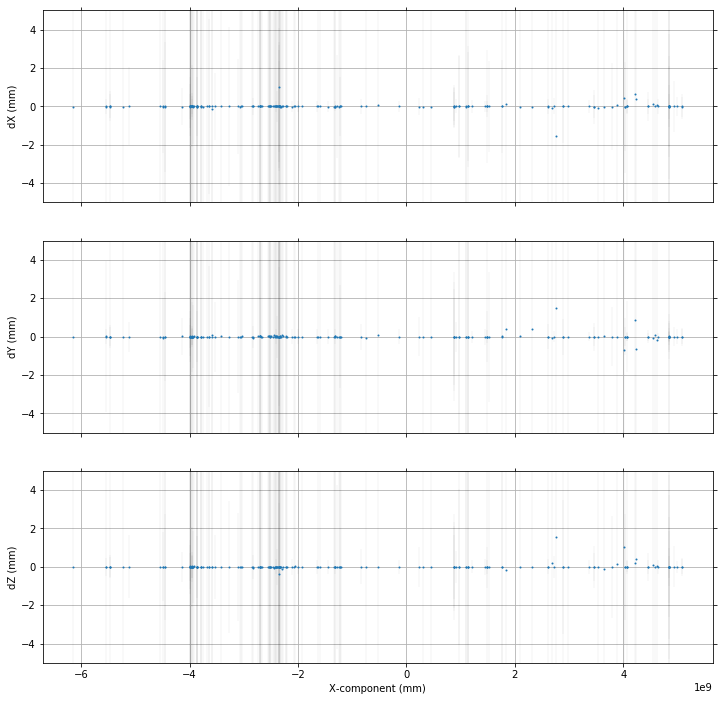

In [33]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["xp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["xp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["xp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

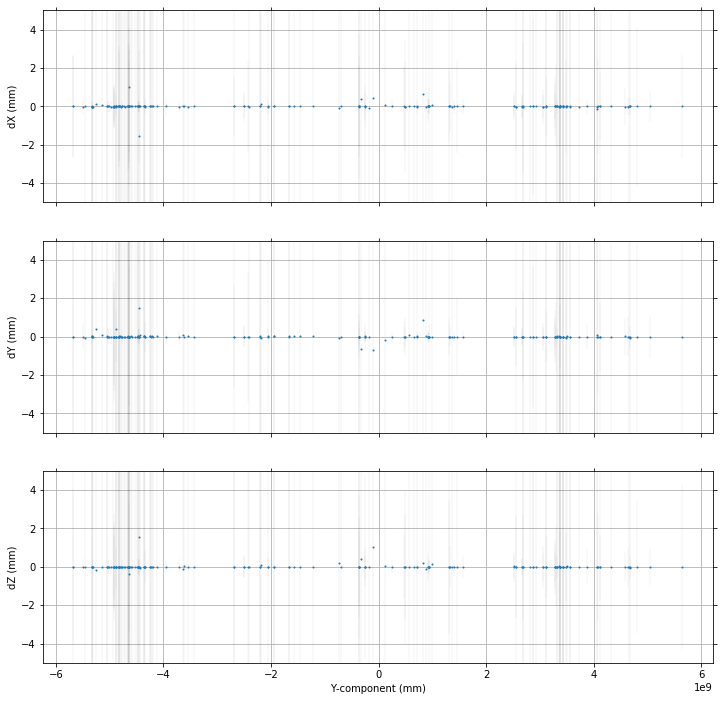

In [34]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["yp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["yp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["yp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

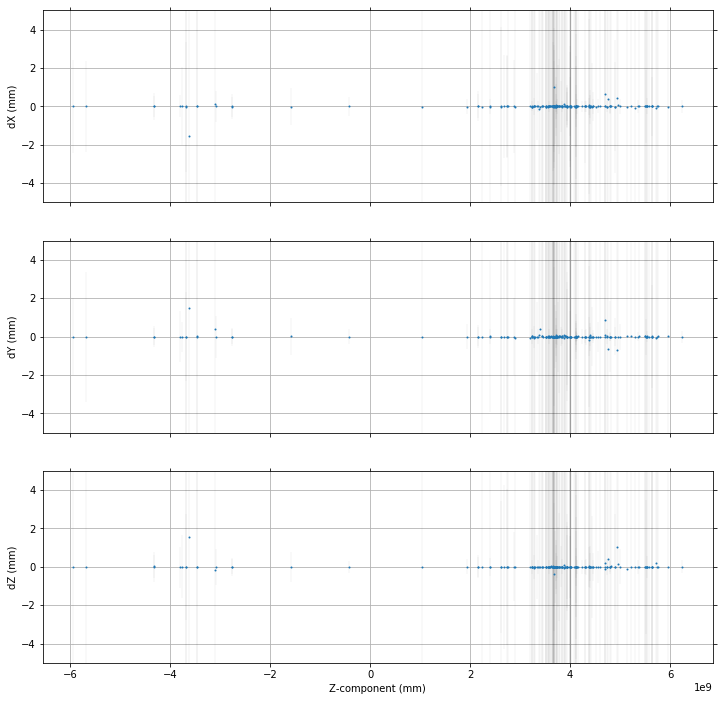

In [35]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["zp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["zp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["zp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [36]:
from my_progs.vlbi.helmert_trans import helmert_trans

dxp = np.array(trfoft["dxp"])
dyp = np.array(trfoft["dyp"])
dzp = np.array(trfoft["dzp"])
dxp_err = np.array(trfoft["dxp_err"])
dyp_err = np.array(trfoft["dyp_err"])
dzp_err = np.array(trfoft["dzp_err"])
xp = np.array(trfoft["xp"])
yp = np.array(trfoft["yp"])
zp = np.array(trfoft["zp"])
xy_cov = np.array(trfoft["dxp_dyp_cov"])
xz_cov = np.array(trfoft["dxp_dzp_cov"])
yz_cov = np.array(trfoft["dyp_dzp_cov"])

helmert_trans(dxp, dyp, dzp, dxp_err, dyp_err, dzp_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp)

#### Translation component (mm):
    -0.002 +/-    0.072 |   -0.000 +/-    0.076 |   +0.000 +/-    0.069 | =>    0.002 +/-    0.000
#### Scale factor (ppb）:
    0.000 +/-   0.014
#### Rotation component（mas）:
     +0.000 +/-    0.003 |    +0.000 +/-    0.002 |    +0.000 +/-    0.003 | =>   +0.000 +/-    0.000
##   correlation coefficients are:
 [[ 1.         -0.23196182  0.00662411 -0.0289875  -0.01012452  0.20920752
   0.66156721]
 [-0.23196182  1.          0.07718809  0.086799    0.68233246 -0.0467131
  -0.30213716]
 [ 0.00662411  0.07718809  1.         -0.36294619  0.1696049   0.20600669
   0.00304734]
 [-0.0289875   0.086799   -0.36294619  1.          0.04064929 -0.07566005
  -0.0640213 ]
 [-0.01012452  0.68233246  0.1696049   0.04064929  1.         -0.05407448
   0.02649974]
 [ 0.20920752 -0.0467131   0.20600669 -0.07566005 -0.05407448  1.
   0.12935975]
 [ 0.66156721 -0.30213716  0.00304734 -0.0640213   0.02649974  0.12935975
   1.        ]]


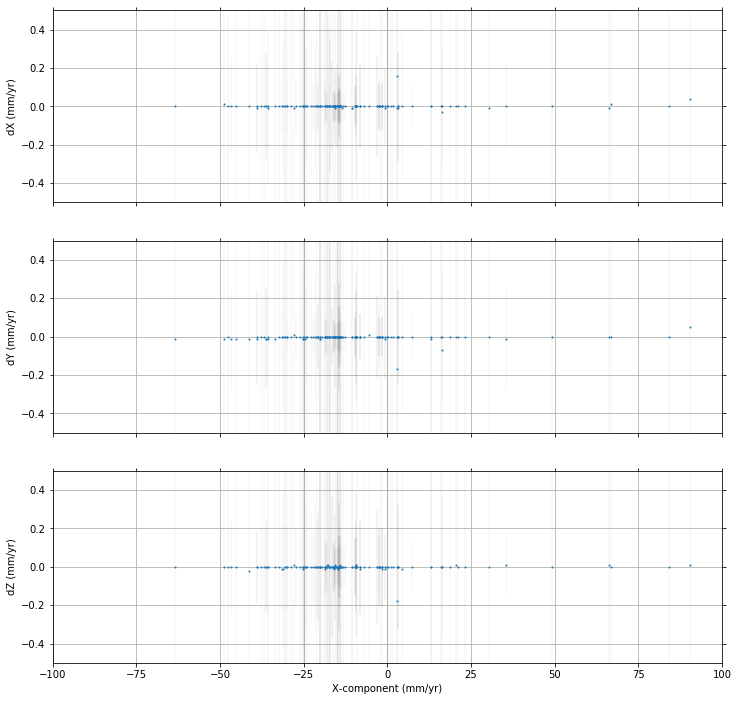

In [38]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["xv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["xv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["xv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

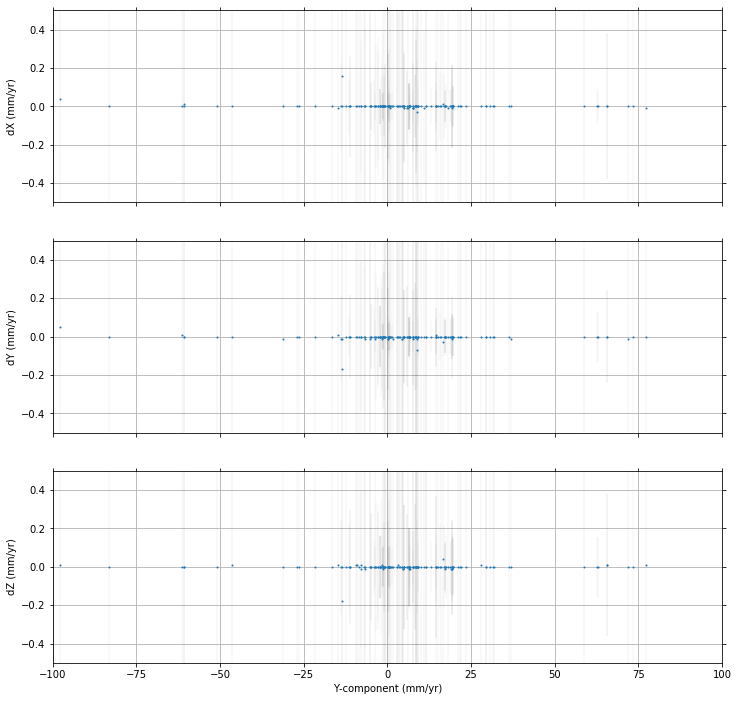

In [39]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["yv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["yv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["yv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

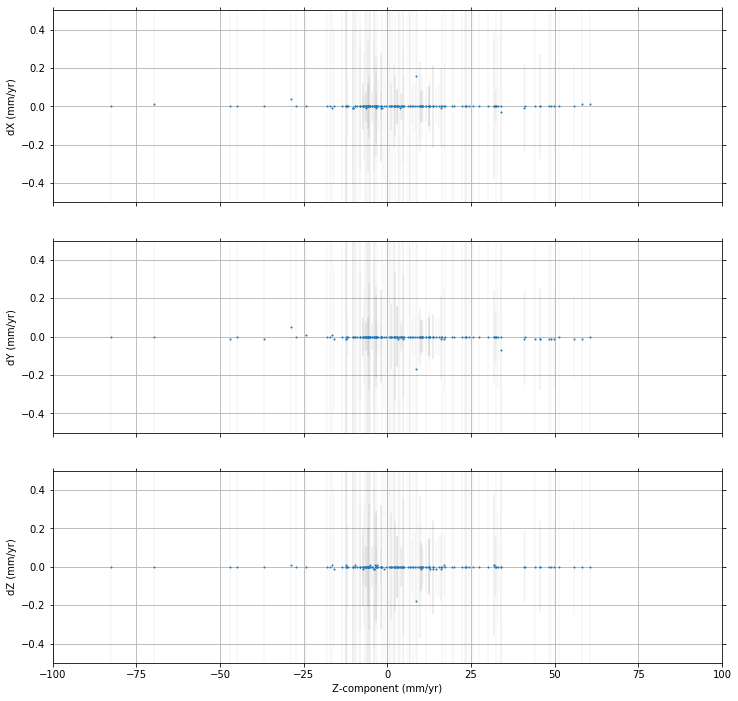

In [40]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["zv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["zv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["zv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [41]:
dxv = np.array(trfoft["dxv"])
dyv = np.array(trfoft["dyv"])
dzv = np.array(trfoft["dzv"])
dxv_err = np.array(trfoft["dxv_err"])
dyv_err = np.array(trfoft["dyv_err"])
dzv_err = np.array(trfoft["dzv_err"])
xy_cov = np.array(trfoft["dxv_dyv_cov"])
xz_cov = np.array(trfoft["dxv_dzv_cov"])
yz_cov = np.array(trfoft["dyv_dzv_cov"])

helmert_trans(dxv, dyv, dzv, dxv_err, dyv_err, dzv_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp, data_type="v")

#### Translation component (mm/yr):
    -0.002 +/-    0.015 |   +0.001 +/-    0.022 |   -0.006 +/-    0.018 | =>    0.006 +/-    0.000
#### Scale factor (ppb/yr）:
   -0.000 +/-   0.002
#### Rotation component（mas/yr）:
     -0.000 +/-    0.001 |    -0.000 +/-    0.001 |    -0.000 +/-    0.001 | =>   +0.000 +/-    0.000
##   correlation coefficients are:
 [[ 1.00000000e+00 -2.80172301e-02 -1.99404217e-02  4.30886206e-03
   2.58372311e-02 -3.71159348e-03  6.34476091e-01]
 [-2.80172301e-02  1.00000000e+00  3.57369836e-01  9.00384041e-03
   8.63105547e-01  2.93615880e-02  6.90490434e-03]
 [-1.99404217e-02  3.57369836e-01  1.00000000e+00 -8.23008946e-02
   4.50833109e-01  5.22525253e-02 -2.30606751e-02]
 [ 4.30886206e-03  9.00384041e-03 -8.23008946e-02  1.00000000e+00
   8.69896813e-03  8.46585118e-04  4.42685055e-03]
 [ 2.58372311e-02  8.63105547e-01  4.50833109e-01  8.69896813e-03
   1.00000000e+00 -1.11700127e-02  3.29784252e-02]
 [-3.71159348e-03  2.93615880e-02  5.22525253e-02  8.465851

## Summary

When I provided position of only one and 250 radio sources as the a priori source position in the VLBI solution, 
the resulted CRFs will have a orientation offset among the CRF axes.
As the same time, the CPO series also yield offset correspondingly.
That is, the offset in dX is almost the same to the value of $R_Y$.
So do the dY and $R_X$.
And there is no offset found in polar motion and TRF.

As a result, if we borrow the Gaia position and use them directly in the VLBI solutions, the CRF and EOP (*UT1* and CPO series) will change but still consistent with each other while the TRF and polar motion is less affected.